In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib notebook

In [2]:
A=np.array([[100, np.power(100,2), np.power(100,3)],
           [419.53, np.power(419.53,2), np.power(419.53,3)],
           [960.8, np.power(960.8,2), np.power(960.8,3)]])
print(A)

[[1.00000000e+02 1.00000000e+04 1.00000000e+06]
 [4.19530000e+02 1.76005421e+05 7.38395542e+07]
 [9.60800000e+02 9.23136640e+05 8.86949684e+08]]


In [3]:
Inverse=np.linalg.inv(A)
print('Inverse of A=',Inverse)

Inverse of A= [[ 1.46548750e-02 -1.32417193e-03  9.37160148e-05]
 [-5.01844339e-05  1.46199165e-05 -1.16054349e-06]
 [ 3.63568378e-08 -1.37819726e-08  2.23383345e-09]]


In [4]:
b=np.array([[645],
          [3375],
          [9149]])
a1_a2_a3=np.matmul(Inverse, b)
print(a1_a2_a3)

[[ 5.84072195e+00]
 [ 6.35544597e-03]
 [-2.62665485e-06]]


In [5]:
d=np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
v=np.array([0.0, 16.5, 32.0, 44.0, 51.5, 55.5, 58.0])
print("Displacement(cm) :", d)
print('voltage(mV) :', v)

Displacement(cm) : [0.  0.5 1.  1.5 2.  2.5 3. ]
voltage(mV) : [ 0.  16.5 32.  44.  51.5 55.5 58. ]


In [6]:
curve2=np.polyfit(d, v, 2)
curve2

array([-6.5       , 38.89285714, -0.42857143])

In [7]:
poly2=np.poly1d(curve2)
print(poly2)

      2
-6.5 x + 38.89 x - 0.4286


<IPython.core.display.Javascript object>


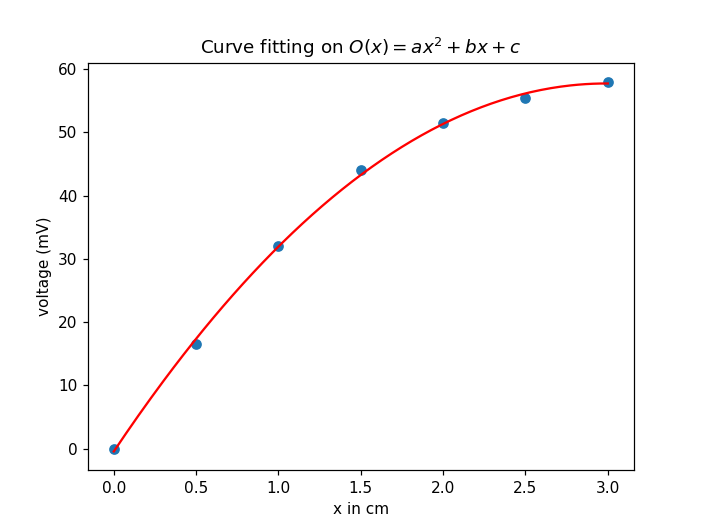

Text(0, 0.5, 'voltage (mV)')

In [8]:
plt.figure(1)

x=np.linspace(0, 3, 200)
plt.scatter(d, v)
plt.plot(x, poly2(x), 'r')

plt.title(
    "Curve fitting on $O(x)=a x^{2}+b x+c$")
plt.xlabel('x in cm')
plt.ylabel('voltage (mV)')

In [9]:
S=19.33*x
N=poly2(x)-S
print('Maximum Value of N(x)=', np.max(N))
max_N = np.where(N == np.max(N))
print('Index of Maximum N(x) value=',max_N)

Maximum Value of N(x)= 14.290818774417684
Index of Maximum N(x) value= (array([100], dtype=int64),)


In [10]:
max_x=x[100]
print('x value for Maximum Value of N(x)=',max_x) 

x value for Maximum Value of N(x)= 1.507537688442211


<IPython.core.display.Javascript object>


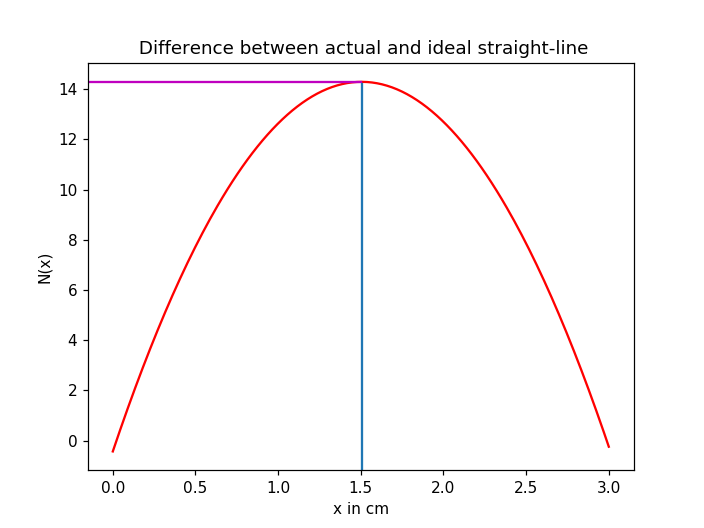

Text(0, 0.5, 'N(x)')

In [11]:
plt.figure(2)
plt.plot(x, N, 'r')
plt.axhline(y=14.290818774417684,xmin=0, xmax=0.5, c='m')
plt.axvline(x=1.507537688442211,ymin=0, ymax=0.95)
plt.title(
    " Difference between actual and ideal straight-line")
plt.xlabel('x in cm')
plt.ylabel('N(x)')

In [12]:
h=np.array([0.0, 1.5, 3.0, 4.5, 6.0, 7.5, 9.0, 10.5, 12, 13.5, 15])
h_v_inc=np.array([0.0, 0.35, 1.42, 2.40, 3.43, 4.35, 5.61, 6.50, 7.77,
             8.85, 10.2])
h_v_dec=np.array([0.14, 1.25, 2.32, 3.55, 4.43, 5.70, 6.78, 7.80, 8.87,
                 9.65,10.2])
print("Level h(cm) :", h)
print('Output volts h increasing :', h_v_inc)
print('Output volts h decreasing :', h_v_dec)

Level h(cm) : [ 0.   1.5  3.   4.5  6.   7.5  9.  10.5 12.  13.5 15. ]
Output volts h increasing : [ 0.    0.35  1.42  2.4   3.43  4.35  5.61  6.5   7.77  8.85 10.2 ]
Output volts h decreasing : [ 0.14  1.25  2.32  3.55  4.43  5.7   6.78  7.8   8.87  9.65 10.2 ]


In [13]:
curve_h_v_inc=np.polyfit(h, h_v_inc, 2)
curve_h_v_inc

array([ 0.01074851,  0.53228749, -0.21314685])

In [14]:
poly_h_v_inc=np.poly1d(curve_h_v_inc)
print(poly_h_v_inc)

         2
0.01075 x + 0.5323 x - 0.2131


In [15]:
curve_h_v_dec=np.polyfit(h, h_v_dec, 2)
curve_h_v_dec

array([-0.00864025,  0.82293706,  0.02566434])

In [16]:
poly_h_v_dec=np.poly1d(curve_h_v_dec)
print(poly_h_v_dec)

          2
-0.00864 x + 0.8229 x + 0.02566


<IPython.core.display.Javascript object>


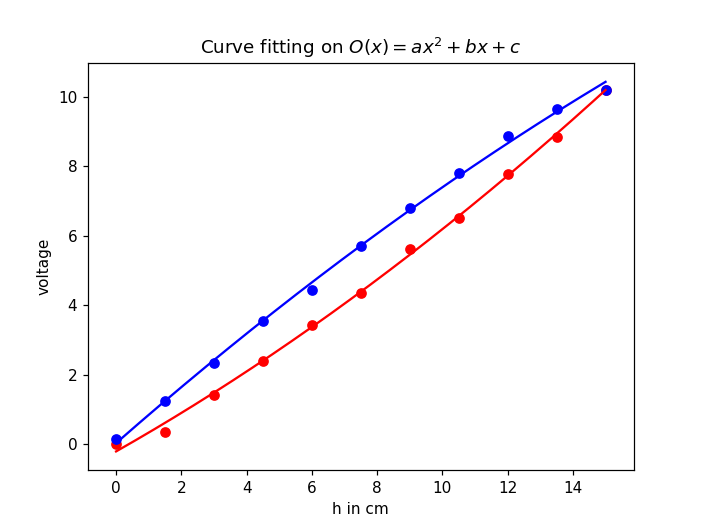

Text(0, 0.5, 'voltage')

In [17]:
plt.figure(3)

x_h=np.linspace(0, 15, 500)
plt.scatter(h, h_v_inc,c='r')
plt.scatter(h, h_v_dec,c='b')
plt.plot(x_h, poly_h_v_inc(x_h), 'r')
plt.plot(x_h, poly_h_v_dec(x_h), 'b')

plt.title(
    "Curve fitting on $O(x)=a x^{2}+b x+c$")
plt.xlabel('h in cm')
plt.ylabel('voltage')

In [18]:
H=poly_h_v_dec(x_h)-poly_h_v_inc(x_h)
print('Maximum Value of H(x)=', np.max(H))
max_H = np.where(H == np.max(H))
print('Index of Maximum H(x) value=',max_H)

Maximum Value of H(x)= 1.328063620830238
Index of Maximum H(x) value= (array([249], dtype=int64),)


In [19]:
max_x_h=x_h[249]
print('x value for Maximum Value of H(x)=',max_x_h)

x value for Maximum Value of H(x)= 7.484969939879759


<IPython.core.display.Javascript object>


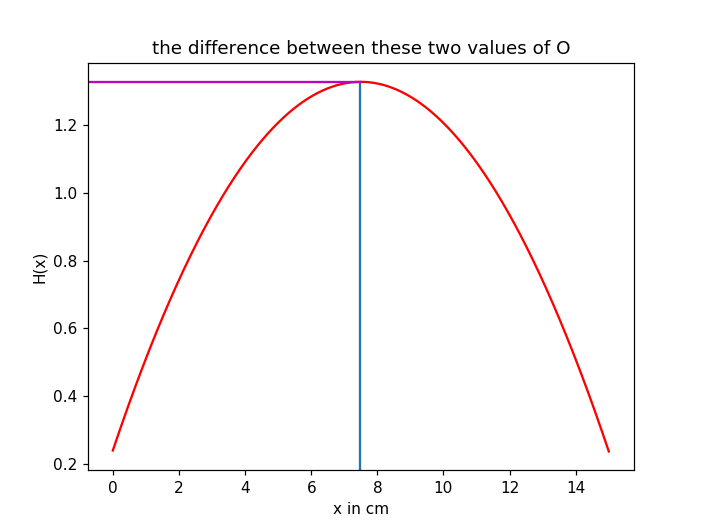

Text(0, 0.5, 'H(x)')

In [20]:
plt.figure(4)
plt.plot(x_h, H, 'r')
plt.axhline(y=1.328063620830238,xmin=0, xmax=0.5, c='m')
plt.axvline(x=7.484969939879759,ymin=0, ymax=0.95)
plt.title("the difference between these two values of O")
plt.xlabel('x in cm')
plt.ylabel('H(x)')